<a href="https://colab.research.google.com/github/iamgj01/Practice_Python/blob/main/HR_Analytics_MeriSkill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')

In [44]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,Other,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EmployeeCount             1470 non-null   int64 
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [46]:
df.isnull().any()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [47]:
df= df.drop(['BusinessTravel', 'DailyRate', 'EmployeeNumber', 'EmployeeCount', 'EnvironmentSatisfaction',
          'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'Over18', 'PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours','StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)

∙        Plot a correlation map for all numeric variables
∙        Overtime
∙        Marital Status
∙        Job Role
∙        Gender
∙        Education Field
∙        Department
∙        Business Travel
∙        Relation between Overtime and Age
∙        Total Working Years
∙        Education Level
∙        Number of Companies Worked
∙        Distance from Home



In [48]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1470 non-null   int64 
 1   Department          1470 non-null   object
 2   DistanceFromHome    1470 non-null   int64 
 3   EducationField      1470 non-null   object
 4   Gender              1470 non-null   object
 5   JobLevel            1470 non-null   int64 
 6   JobRole             1470 non-null   object
 7   MaritalStatus       1470 non-null   object
 8   MonthlyIncome       1470 non-null   int64 
 9   MonthlyRate         1470 non-null   int64 
 10  NumCompaniesWorked  1470 non-null   int64 
 11  OverTime            1470 non-null   object
 12  TotalWorkingYears   1470 non-null   int64 
 13  YearsInCurrentRole  1470 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 160.9+ KB


In [50]:
df.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,TotalWorkingYears,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.063946,6502.931293,14313.103401,2.693197,11.279592,4.229252
std,9.135373,8.106864,1.106940,4707.956783,7117.786044,2.498009,7.780782,3.623137
min,18.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,6.000000,2.000000
50%,36.000000,7.000000,2.000000,4919.000000,14235.500000,2.000000,10.000000,3.000000
75%,43.000000,14.000000,3.000000,8379.000000,20461.500000,4.000000,15.000000,7.000000
max,60.000000,29.000000,5.000000,19999.000000,26999.000000,9.000000,40.000000,18.000000


In [51]:
df.head(20)

,Age,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsInCurrentRole
0,41,Sales,1,Life Sciences,Female,2,Sales Executive,Single,5993,19479,8,Yes,8,4
1,49,Research & Development,8,Life Sciences,Male,2,Research Scientist,Married,5130,24907,1,No,10,7
2,37,Research & Development,2,Other,Male,1,Laboratory Technician,Single,2090,2396,6,Yes,7,0
3,33,Research & Development,3,Life Sciences,Female,1,Research Scientist,Married,2909,23159,1,Yes,8,7
4,27,Research & Development,2,Medical,Male,1,Laboratory Technician,Married,3468,16632,9,No,6,2
5,32,Research & Development,2,Life Sciences,Male,1,Laboratory Technician,Single,3068,11864,0,No,8,7
6,59,Research & Development,3,Medical,Female,1,Laboratory Technician,Married,2670,9964,4,Yes,12,0
7,30,Research & Development,24,Life Sciences,Male,1,Laboratory Technician,Divorced,2693,13335,1,No,1,0
8,38,Research & Development,23,Life Sciences,Male,3,Manufacturing Director,Single,9526,8787,0,No,10,7
9,36,Research & Development,27,Medical,Male,2,Healthcare Representative,Married,5237,16577,6,No,17,7


In [39]:
df = df.drop(['Attrition','Education'], axis=1)

In [52]:
df.head()

,Age,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsInCurrentRole
0,41,Sales,1,Life Sciences,Female,2,Sales Executive,Single,5993,19479,8,Yes,8,4
1,49,Research & Development,8,Life Sciences,Male,2,Research Scientist,Married,5130,24907,1,No,10,7
2,37,Research & Development,2,Other,Male,1,Laboratory Technician,Single,2090,2396,6,Yes,7,0
3,33,Research & Development,3,Life Sciences,Female,1,Research Scientist,Married,2909,23159,1,Yes,8,7
4,27,Research & Development,2,Medical,Male,1,Laboratory Technician,Married,3468,16632,9,No,6,2


In [53]:
df.drop_duplicates()

,Age,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsInCurrentRole
0,41,Sales,1,Life Sciences,Female,2,Sales Executive,Single,5993,19479,8,Yes,8,4
1,49,Research & Development,8,Life Sciences,Male,2,Research Scientist,Married,5130,24907,1,No,10,7
2,37,Research & Development,2,Other,Male,1,Laboratory Technician,Single,2090,2396,6,Yes,7,0
3,33,Research & Development,3,Life Sciences,Female,1,Research Scientist,Married,2909,23159,1,Yes,8,7
4,27,Research & Development,2,Medical,Male,1,Laboratory Technician,Married,3468,16632,9,No,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,Medical,Male,2,Laboratory Technician,Married,2571,12290,4,No,17,2
1466,39,Research & Development,6,Medical,Male,3,Healthcare Representative,Married,9991,21457,4,No,9,7
1467,27,Research & Development,4,Life Sciences,Male,2,Manufacturing Director,Married,6142,5174,1,Yes,6,2
1468,49,Sales,2,Medical,Male,2,Sales Executive,Married,5390,13243,2,No,17,6


In [54]:
df.groupby('JobRole')[[ 'Gender','Department','MaritalStatus']].value_counts()

JobRole                    Gender  Department              MaritalStatus
Healthcare Representative  Male    Research & Development  Married          37
                           Female  Research & Development  Married          24
                           Male    Research & Development  Divorced         24
                                                           Single           19
                           Female  Research & Development  Single           17
                                                                            ..
Sales Representative       Female  Sales                   Single           19
                           Male    Sales                   Single           19
                           Female  Sales                   Married          14
                           Male    Sales                   Divorced          6
                           Female  Sales                   Divorced          5
Length: 65, dtype: int64

In [55]:
df.dtypes

Age                    int64
Department            object
DistanceFromHome       int64
EducationField        object
Gender                object
JobLevel               int64
JobRole               object
MaritalStatus         object
MonthlyIncome          int64
MonthlyRate            int64
NumCompaniesWorked     int64
OverTime              object
TotalWorkingYears      int64
YearsInCurrentRole     int64
dtype: object

In [56]:
# 1.  Plot a correlation map for all numeric variables
df[['Age','DistanceFromHome','MonthlyIncome','MonthlyRate','NumCompaniesWorked','TotalWorkingYears','YearsInCurrentRole']].corr()

,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,TotalWorkingYears,YearsInCurrentRole
Age,1.000000,-0.001686,0.497855,0.028051,0.299635,0.680381,0.212901
DistanceFromHome,-0.001686,1.000000,-0.017014,0.027473,-0.029251,0.004628,0.018845
MonthlyIncome,0.497855,-0.017014,1.000000,0.034814,0.149515,0.772893,0.363818
MonthlyRate,0.028051,0.027473,0.034814,1.000000,0.017521,0.026442,-0.012815
NumCompaniesWorked,0.299635,-0.029251,0.149515,0.017521,1.000000,0.237639,-0.090754
TotalWorkingYears,0.680381,0.004628,0.772893,0.026442,0.237639,1.000000,0.460365
YearsInCurrentRole,0.212901,0.018845,0.363818,-0.012815,-0.090754,0.460365,1.000000


<Axes: xlabel='OverTime', ylabel='count'>

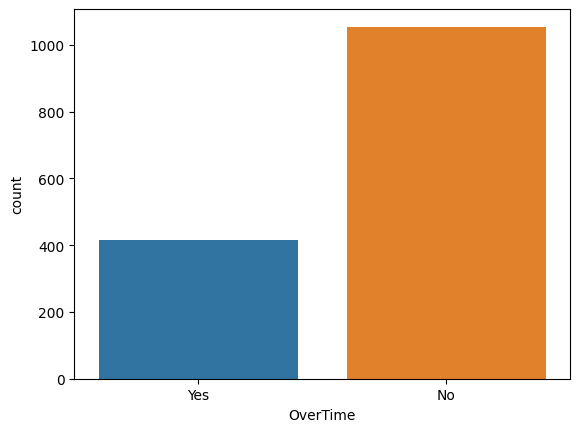

In [17]:
sns.countplot(x='OverTime',data=df)
#plt.title('OverTime')
#plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

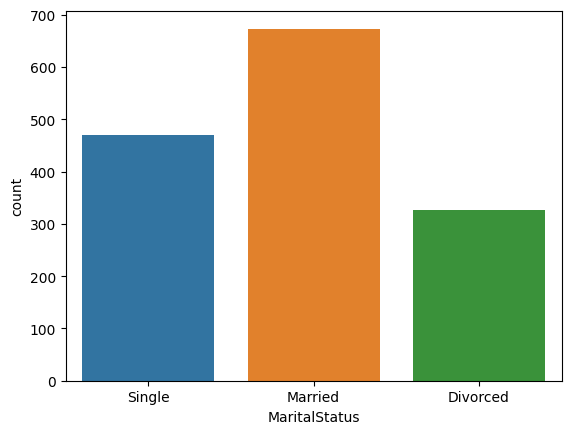

In [18]:
sns.countplot(x='MaritalStatus',data=df)

<Axes: xlabel='count', ylabel='JobRole'>

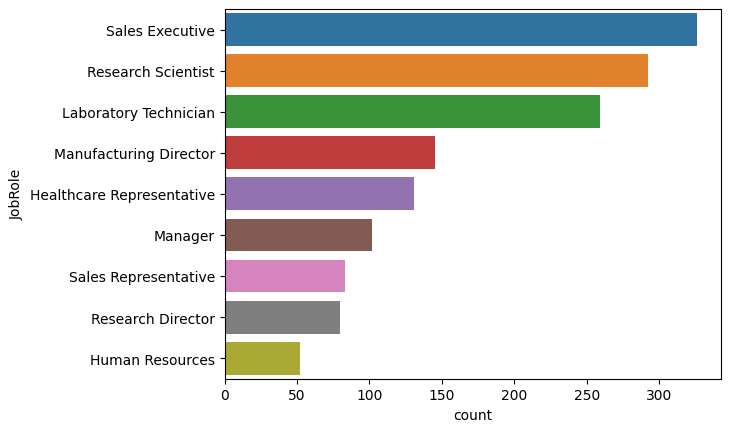

In [29]:
sns.countplot(y='JobRole',data=df)
#plt.figure(figsize=(10,5))
#plt.show()

<Axes: xlabel='Gender', ylabel='count'>

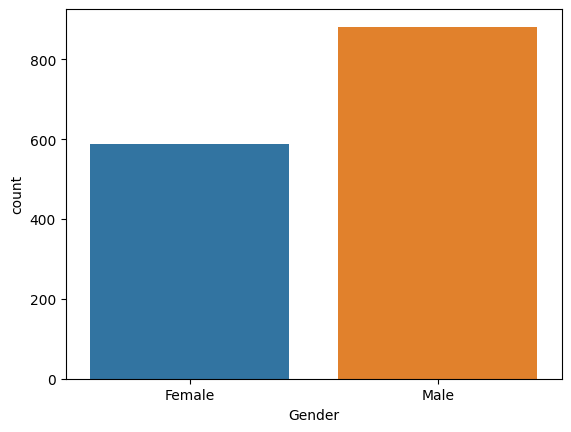

In [30]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='count', ylabel='EducationField'>

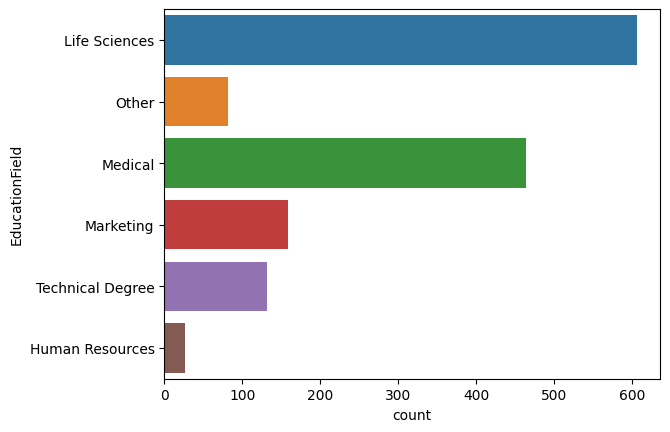

In [38]:
sns.countplot(y='EducationField', data=df)


<Axes: xlabel='count', ylabel='Department'>

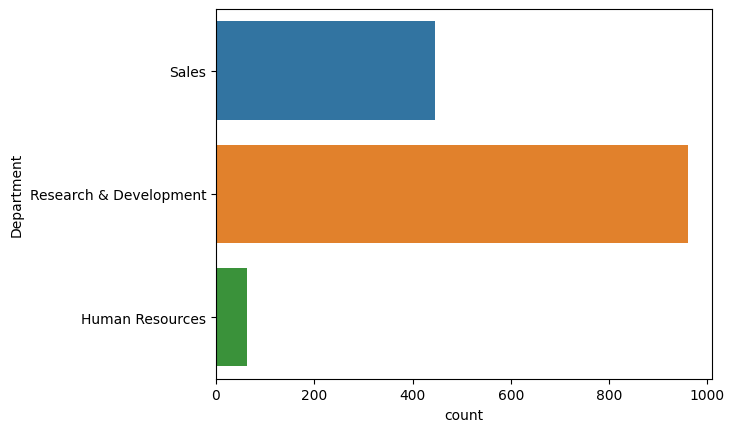

In [58]:
sns.countplot(y='Department', data=df)

<ipython-input-91-5abd0c4aa5e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


Text(0.5, 1.0, 'Correlation map of all numeric variables')

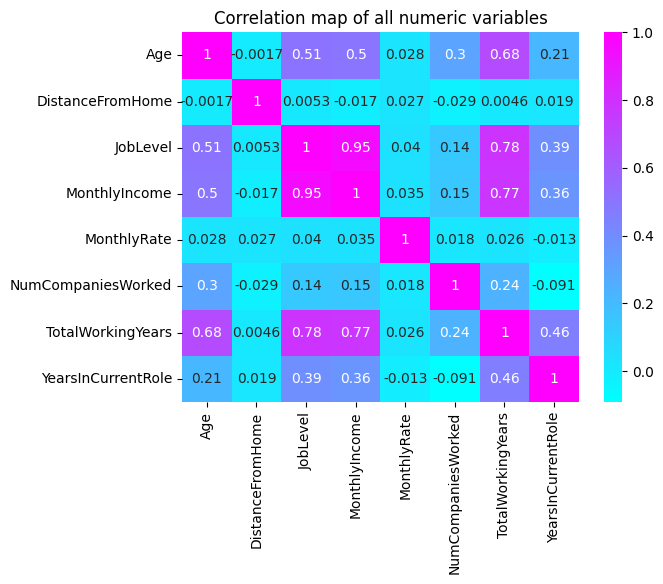

In [91]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Correlation map of all numeric variables')

<Axes: xlabel='OverTime', ylabel='Age'>

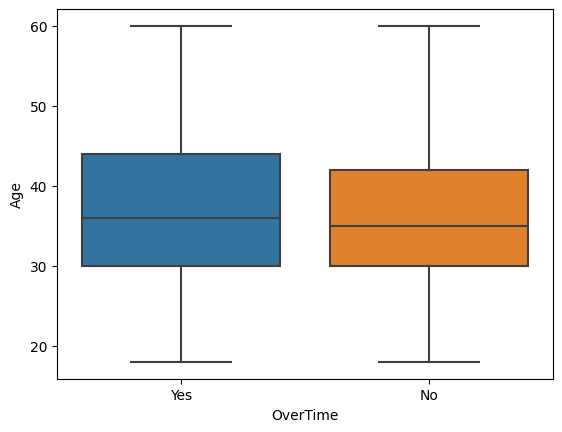

In [67]:
sns.boxplot(x='OverTime', y='Age', data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

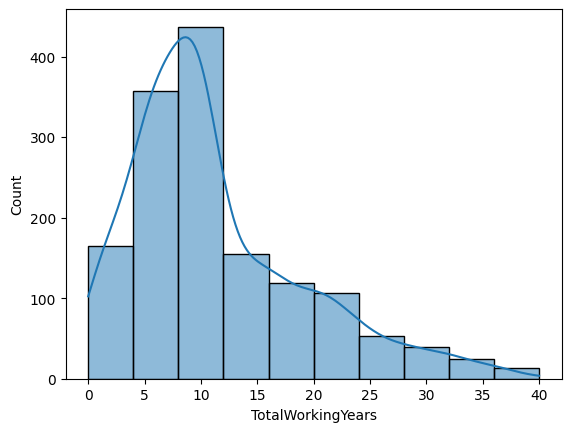

In [75]:
sns.histplot(x='TotalWorkingYears', bins=10,kde=True, data=df)

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

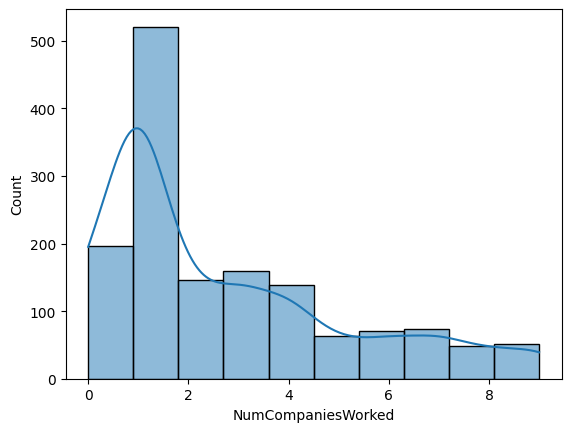

In [76]:
sns.histplot(x='NumCompaniesWorked', bins=10,kde=True, data=df)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

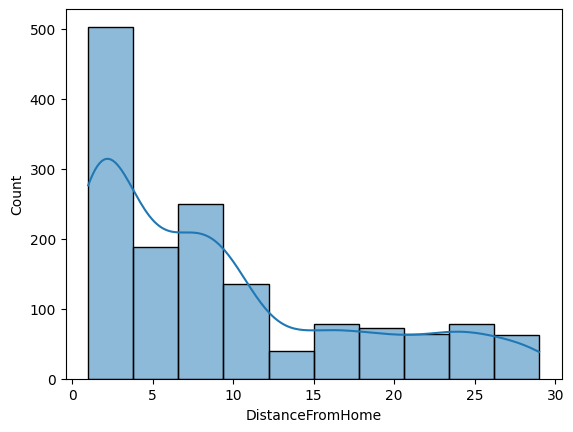

In [77]:
sns.histplot(x='DistanceFromHome', bins=10,kde=True, data=df)

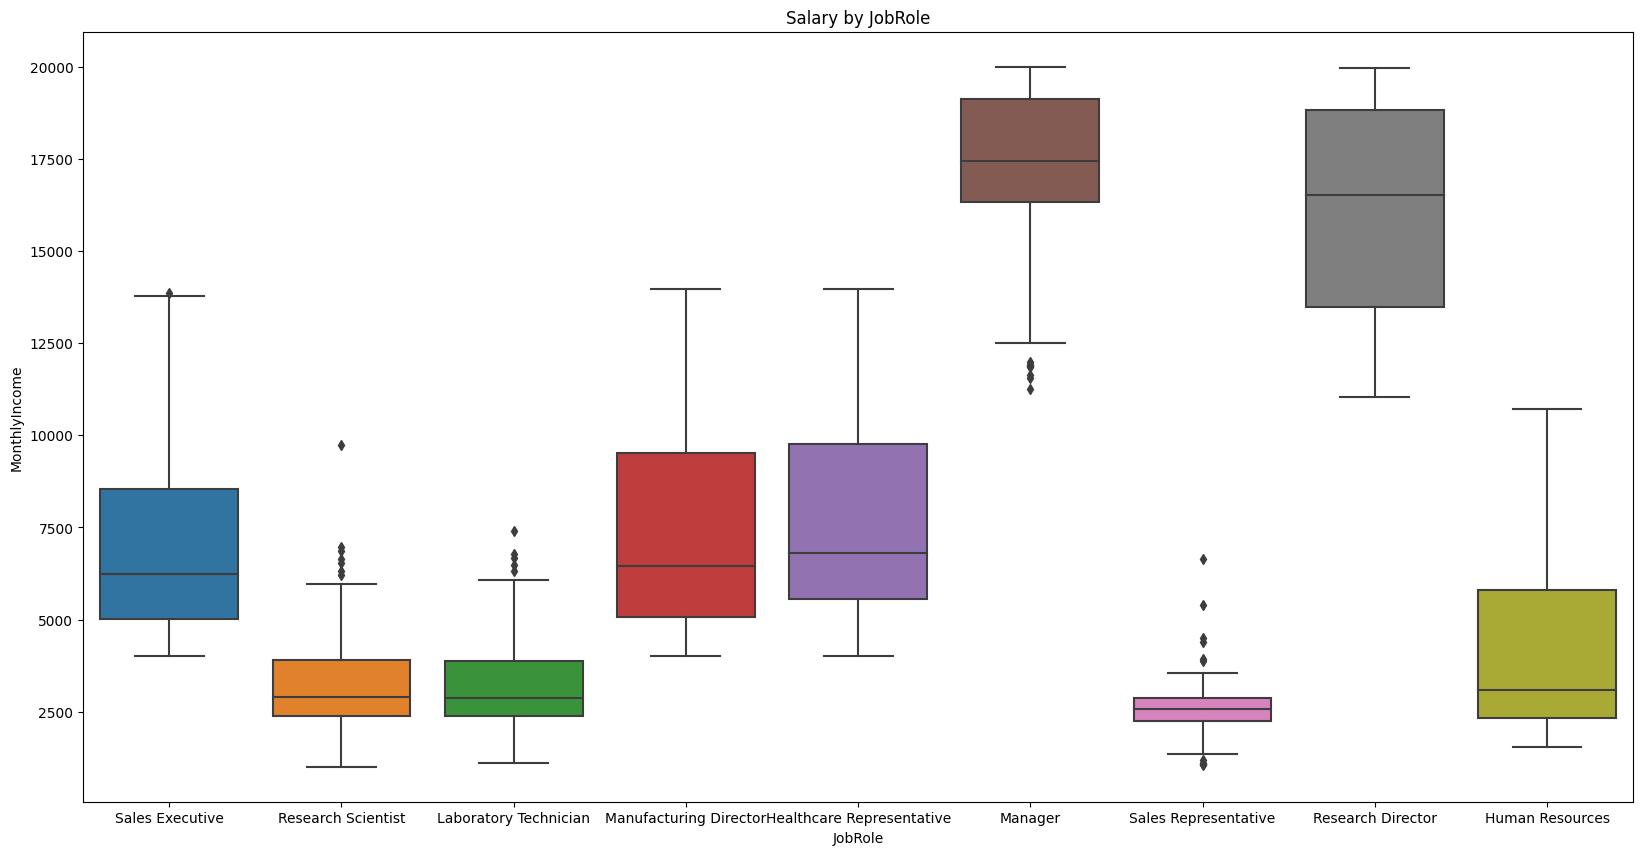

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x='JobRole',y='MonthlyIncome', data=df)
plt.title('Salary by JobRole')
plt.show()

Text(0.5, 1.0, 'Age distribution by department')

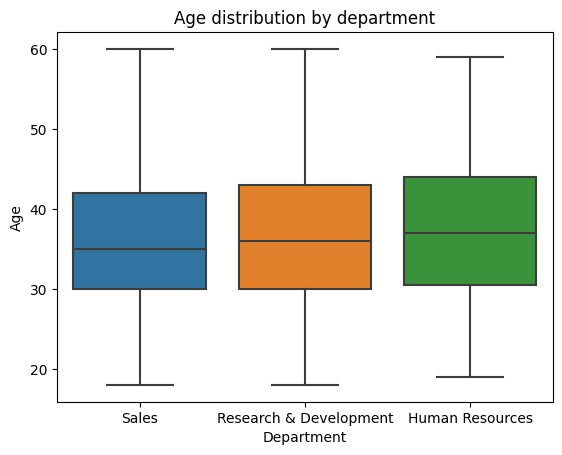

In [95]:
sns.boxplot(x='Department',y='Age',data=df)
plt.title('Age distribution by department')